In [84]:
import pandas as pd 
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

In [85]:
#read the case and death csv file 
read_cases = pd.read_csv('../../data/COVID-19 Dataset/confirmed.csv')
read_death = pd.read_csv('../../data/COVID-19 Dataset/deaths.csv')
read_covid19 = pd.read_csv('../../data/output/covid.csv')

In [86]:
#clean the data for cases in MI
read_cases1= read_cases.drop(columns=['countyFIPS', 'stateFIPS'], axis=1)
group_by_States = read_cases1.groupby(['State']).sum()
MI_state_cases =read_cases1.loc[read_cases1['State'] == 'MI']
MI_state_cases
MI_state_cases=MI_state_cases.groupby(['State']).sum()

#Clean the data for death MI
read_death1= read_death.drop(columns=['countyFIPS', 'stateFIPS'], axis=1)
group_by_States = read_death1.groupby(['State']).sum()
MI_state_death =read_death1.loc[read_death1['State'] == 'MI']
MI_state_death
MI_state_death=MI_state_death.groupby(['State']).sum()

#### This section will get the number of daily new cases in the state of Michigan

In [87]:
daily_new_cases_MI= MI_state_cases.diff(axis=1)
daily_new_cases_MI['1/22/20'].fillna(0, inplace=True)
daily_new_cases_MI

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20
State,,,,,,,,,,,,,,,,,,,,,
MI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,923.0,0.0,1252.0,495.0,957.0,987.0,1408.0,786.0,0.0,1255.0


#### This section will get the number of daily new deaths in the state of Michigan

In [88]:
daily_new_death_MI= MI_state_death.diff(axis=1)
daily_new_death_MI['1/22/20'].fillna(0, inplace=True)
daily_new_death_MI

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20
State,,,,,,,,,,,,,,,,,,,,,
MI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,5.0,3.0,61.0,22.0,7.0,11.0,0.0,10.0


#### Normalizing the daily new cases and death of MI state by 10_000_000. This seems to be an reasonable number to normalize with otherwise the number will be very small.

In [89]:
normalized_daily_new_cases_MI= round(((daily_new_cases_MI.div(9986857)).multiply(1_000_000)))
normalized_daily_new_death_MI= round(((daily_new_death_MI.div(9986857)).multiply(1_000_000)))

#### Split data by week and centralized the data by taking the mean 

In [90]:
weekly_mean_for_cases = round(normalized_daily_new_cases_MI.groupby(np.arange(len(normalized_daily_new_cases_MI.columns)) // 7, axis=1).mean())
weekly_mean_for_cases

weekly_mean_for_death = round(normalized_daily_new_death_MI.groupby(np.arange(len(normalized_daily_new_death_MI.columns)) // 7, axis=1).mean())
weekly_mean_for_death

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
State,,,,,,,,,,,,,,,,,,,,,
MI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0


#### This section gets the mean, median and mode of Michigan state

In [91]:
#statistic for cases 
the_mean_cases= round( weekly_mean_for_cases.mean(axis=1))
the_median_cases= weekly_mean_for_cases.median(axis=1)
the_mode_cases= weekly_mean_for_cases.mode(axis=1)

#statistic for death
the_mean_death= round( weekly_mean_for_death.mean(axis=1))
the_median_death= weekly_mean_for_death.median(axis=1)
the_mode_death= weekly_mean_for_death.mode(axis=1)


In [92]:
# initialize list of lists so as to have a dataframe with all the statistical values for cases
data = {'State':['MI'], 'Mean':[the_mean_cases[0]], 'Median':[the_median_cases[0]], 'Mode':[the_mode_cases[0][0]]} 
weekly_stat_cases = pd.DataFrame(data)
weekly_stat_cases

,State,Mean,Median,Mode
0,MI,53.0,59.5,0.0


In [93]:
# initialize list of lists so as to have a dataframe with all the statistical values fro death
data = {'State':['MI'], 'Mean':[the_mean_death[0]], 'Median':[the_median_death[0]], 'Mode':[the_mode_death[0][0]]} 
weekly_stat_death = pd.DataFrame(data)
weekly_stat_death

,State,Mean,Median,Mode
0,MI,3.0,1.0,1.0


#### Conclusion:  For the COVID19 cases in Michigan state, the mean and the median are used to measure central tendency of a distribution; in both cases, the mean and the median are not equal. 

#### This section gets the states that have similar population with Michigan state so the comparaison between the statistics of the state will be relevant .

In [94]:
group_by_States = read_covid19.groupby(['State']).sum()
similar_to_MI =group_by_States[(group_by_States.population >= 9500000) & (group_by_States.population >= 9990000)]
similar_to_MI.head()

,Unnamed: 0,countyFIPS,population,stateFIPS,1/22/20_x,1/23/20_x,1/24/20_x,1/25/20_x,1/26/20_x,1/27/20_x,...,10/7/20_y,10/8/20_y,10/9/20_y,10/10/20_y,10/11/20_y,10/12/20_y,10/13/20_y,10/14/20_y,10/15/20_y,10/16/20_y
State,,,,,,,,,,,,,,,,,,,,,
CA,13230,357364,39512223,360,0,0,0,0,2,3,...,16366,16440,16514,16578,16586,16611,16677,16772,16851,16927
FL,24718,808550,21477737,816,0,0,0,0,0,0,...,14903,15068,15184,15184,15361,15409,15530,15595,15735,15830
GA,76400,2092677,10617423,2080,0,0,0,0,0,0,...,7239,7282,7343,7391,7414,7427,7453,7154,7490,7556
IL,67980,1744404,12671821,1751,0,0,1,1,1,1,...,8877,8909,8944,8975,8984,8997,9026,9074,9127,9165
NC,199475,3710000,10488084,3737,0,0,0,0,0,0,...,3693,3721,3747,3765,3770,3773,3814,3854,3874,3910


#### As the states are choosing, the basic same process will be repeat to calculate the weekly stastic of these states

In [95]:
state_to_compare_cases= read_cases1[read_cases1['State'].isin(['MI', 'NC', 'GA', 'OH','IL'])]
state_to_compare_cases=state_to_compare_cases.groupby(['State']).sum()

state_to_compare_death= read_death1[read_death1['State'].isin(['MI', 'NC', 'GA', 'OH','IL'])]
state_to_compare_death=state_to_compare_death.groupby(['State']).sum()

In [96]:
daily_new_cases_C= state_to_compare_cases.diff(axis=1)
#filling the first column with 0 as it was the first day of recording data 
daily_new_cases_C['1/22/20'].fillna(0, inplace=True)
daily_new_cases_C


daily_new_death_C= state_to_compare_death.diff(axis=1)
#filling the first column with 0 as it was the first day of recording data 
daily_new_death_C['1/22/20'].fillna(0, inplace=True)
daily_new_death_C


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20
State,,,,,,,,,,,,,,,,,,,,,
GA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,50.0,60.0,7.0,26.0,58.0,76.0,46.0,41.0,46.0,20.0
IL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,24.0,5.0,8.0,7.0,27.0,26.0,33.0,23.0,14.0,5.0
MI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,5.0,3.0,61.0,22.0,7.0,11.0,0.0,10.0
NC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,85.0,1.0,7.0,13.0,48.0,33.0,33.0,24.0,5.0,8.0
OH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,3.0,18.0,22.0,26.0,30.0,48.0,9.0,4.0,4.0


In [97]:
#normalize the new_cases by 100_000
normalized_daily_new_cases_MI= ((daily_new_cases_C.loc['MI'].div(9986857)).multiply(1_000_000)).round(0)
normalized_daily_new_cases_GA= ((daily_new_cases_C.loc['GA'].div(10617423)).multiply(1_000_000)).round(0)
normalized_daily_new_cases_IL= ((daily_new_cases_C.loc['IL'].div(12671821)).multiply(1_000_000)).round(0)
normalized_daily_new_cases_NC= ((daily_new_cases_C.loc['NC'].div(10488084)).multiply(1_000_000)).round(0)
normalized_daily_new_cases_OH= ((daily_new_cases_C.loc['OH'].div(11689100)).multiply(1_000_000)).round(0)

#normalize the new_death by 1_000_000
normalized_daily_new_death_MI= ((daily_new_death_C.loc['MI'].div(9986857)).multiply(1_000_000)).round(0)
normalized_daily_new_death_GA= ((daily_new_death_C.loc['GA'].div(10617423)).multiply(1_000_000)).round(0)
normalized_daily_new_death_IL= ((daily_new_death_C.loc['IL'].div(12671821)).multiply(1_000_000)).round(0)
normalized_daily_new_death_NC= ((daily_new_death_C.loc['NC'].div(10488084)).multiply(1_000_000)).round(0)
normalized_daily_new_death_OH= ((daily_new_death_C.loc['OH'].div(11689100)).multiply(1_000_000)).round(0)

#### merge all the state together after normalizing the daily data

In [98]:
normalized_state_cases=pd.concat([normalized_daily_new_cases_MI,normalized_daily_new_cases_GA,normalized_daily_new_cases_IL,normalized_daily_new_cases_NC, normalized_daily_new_cases_OH], axis=1)
normalized_state_cases=normalized_state_cases.T

normalized_state_death=pd.concat([normalized_daily_new_death_MI,normalized_daily_new_death_GA,normalized_daily_new_death_IL,normalized_daily_new_death_NC, normalized_daily_new_death_OH], axis=1)
normalized_state_death=normalized_state_death.T

#### Weekly cases and death for all the chosen states

In [99]:
weekly_mean_for_cases_C = round(normalized_state_cases.groupby(np.arange(len(normalized_state_cases.columns)) // 7, axis=1).mean())
weekly_mean_for_cases_C


,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
MI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,25.0,83.0,...,57.0,74.0,70.0,75.0,71.0,75.0,75.0,74.0,73.0,90.0
GA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,13.0,41.0,...,307.0,336.0,350.0,306.0,334.0,257.0,224.0,193.0,171.0,157.0
IL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16.0,50.0,...,79.0,92.0,113.0,124.0,138.0,143.0,157.0,147.0,178.0,136.0
NC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,15.0,...,186.0,182.0,180.0,165.0,132.0,138.0,149.0,159.0,125.0,114.0
OH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,20.0,...,111.0,113.0,114.0,105.0,94.0,87.0,80.0,99.0,90.0,92.0


In [100]:
weekly_mean_for_death_C = round(normalized_state_death.groupby(np.arange(len(normalized_state_death.columns)) // 7, axis=1).mean())
weekly_mean_for_death_C

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
MI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
GA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,2.0,2.0,4.0,5.0,6.0,6.0,6.0,7.0,5.0,4.0
IL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0
NC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,2.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0
OH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0


### Weekly statistic  for the states 

In [101]:
the_mean_C = round(weekly_mean_for_cases_C.mean(axis=1))
the_median_C = round(weekly_mean_for_cases_C.median(axis=1))
the_mode_C = round(weekly_mean_for_cases_C.mode(axis=1))

the_mean_C_death = round(weekly_mean_for_death_C.mean(axis=1))
the_median_C_death = round(weekly_mean_for_death_C.median(axis=1))
the_mode_C_death = round(weekly_mean_for_death_C.mode(axis=1))

In [102]:
# initialize list of lists 
data1 = {'State':['MI','GA', 'IL', 'NC', 'OH'], 'Mean':[the_mean_C.iloc[0],the_mean_C[1],the_mean_C[2],the_mean_C[3], the_mean_C[4]], 'Median':[the_median_C[0],the_median_C[1],the_median_C[2],the_median_C[3],the_median_C[4]],'Mode':[the_mode_C[0][0],the_mode_C[0][0],the_mode_C[0][0],the_mode_C[0][0],the_mode_C[0][0]]} 
weekly_stat_cases = pd.DataFrame(data1)
weekly_stat_cases

,State,Mean,Median,Mode
0,MI,53.0,60.0,0.0
1,GA,118.0,70.0,0.0
2,IL,88.0,88.0,0.0
3,NC,75.0,60.0,0.0
4,OH,50.0,47.0,0.0


#### In some states, the mean is higher than the median and in other state the median is higher thant the mean. Only in IL state we observe an equality between the mean and the median which indicatea a normal distribution of the data of that state. The mode remains 0 because at the beginning of the year, there was 0 cases identified in the US which is why it is the most frequently appeared value in the dataset. 

In [148]:
# initialize list of lists 
data2 = {'State':['MI','GA', 'IL', 'NC', 'OH'], 'Mean':[the_mean_C_death.iloc[0],the_mean_C_death[1],the_mean_C_death[2],the_mean_C_death[3], the_mean_C_death[4]], 'Median':[the_median_C_death[0],the_median_C_death[1],the_median_C_death[2],the_median_C_death[3],the_median_C_death[4]],'Mode':[the_mode_C_death[0][0],the_mode_C_death[0][0],the_mode_C_death[0][0],the_mode_C_death[0][0],the_mode_C_death[0][0]]} 
weekly_stat_death = pd.DataFrame(data2)
weekly_stat_death

,State,Mean,Median,Mode
0,MI,3.0,1.0,1.0
1,GA,3.0,2.0,1.0
2,IL,3.0,1.0,1.0
3,NC,1.0,1.0,1.0
4,OH,2.0,2.0,1.0


#### MI, GA, IL has the same mean for the number of death within the US and it is higher than the median. This time, OH state has a normal distribution for number of death as its mean and median are equal. Note that this number are small because of the normalization. 

In [143]:
import plotly.graph_objects as go

graph = go.Figure()

graph.add_trace(go.Scatter( x=normalized_daily_new_cases_MI.index, y= normalized_daily_new_cases_MI,
                    mode='lines',
                   name="MI"))
graph.show()

In [144]:
import os

if not os.path.exists("images"):
    os.mkdir("images")

graph.write_image("images/daily_trend_cases_MI.png")


In [147]:
graph2 = go.Figure()
graph2.add_trace(go.Scatter( x=normalized_daily_new_death_MI.index, y= normalized_daily_new_death_MI,
                    mode='lines',
                    name="MI"))
graph2.show()
graph2.write_image("images/daily_trend_death_MI.png")

### Identify top 5 counties of MI. The identification was done by computing the value of the mean from the daily record. 

In [105]:
read_cases1 =read_cases1.drop(read_cases1.loc[read_cases1['County Name'] == "Statewide Unallocated"].index)
MI_counties =read_cases1.loc[read_cases1['State'] == 'MI']
county_name= MI_counties['County Name']
new_MI_counties= MI_counties.drop(columns=['State', 'County Name'], axis=1)
new_MI_counties


read_death1 =read_death1.drop(read_death1.loc[read_death1['County Name'] == "Statewide Unallocated"].index)
MI_counties_death =read_death1.loc[read_death1['State'] == 'MI']
county_name= MI_counties_death['County Name']
new_MI_counties_death= MI_counties_death.drop(columns=['State', 'County Name'], axis=1)
new_MI_counties_death
new_MI_counties_death

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20
1255,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
1256,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1257,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,7,7,7,7,7,7
1258,0,0,0,0,0,0,0,0,0,0,...,14,14,14,14,14,14,14,14,14,14
1259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0,0,0,0,0,0,0,0,0,0,...,29,29,29,29,29,29,29,29,29,29
1334,0,0,0,0,0,0,0,0,0,0,...,16,16,16,16,16,16,16,17,17,17
1335,0,0,0,0,0,0,0,0,0,0,...,114,114,114,114,114,114,114,114,114,114
1336,0,0,0,0,0,0,0,0,0,0,...,2896,2896,2896,2897,2929,2939,2940,2941,2941,2942


In [106]:
daily_new_cases_MI_counties= new_MI_counties.diff(axis=1)
#filling the first column with 0 as it was the first day of recording data 
daily_new_cases_MI_counties.fillna(0, inplace=True)
daily_new_cases_MI_counties=daily_new_cases_MI_counties.T
daily_new_cases_MI_counties

daily_new_death_MI_counties= new_MI_counties_death.diff(axis=1)
#filling the first column with 0 as it was the first day of recording data 
daily_new_death_MI_counties.fillna(0, inplace=True)
daily_new_death_MI_counties=daily_new_death_MI_counties.T
daily_new_death_MI_counties

,1255,1256,1257,1258,1259,1260,1261,1262,1263,1264,...,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337
1/22/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/10/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0
9/11/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9/12/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9/13/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
centralized_value_MI_counties = round(daily_new_cases_MI_counties.mean())
merge_with_county_name= (pd.concat([county_name, centralized_value_MI_counties], axis=1))
merge_with_county_name=merge_with_county_name.rename(columns={0:"mean"})
merge_with_county_name.nlargest(5,'mean')

,County Name,mean
1336,Wayne County,141.0
1317,Oakland County,82.0
1304,Macomb County,58.0
1295,Kent County,38.0
1279,Genesee County,17.0


### Centralizing the daily values and getting the mean

In [108]:
centralized_value_MI_counties_death = round(daily_new_death_MI_counties.mean())
merge_with_county_name_death= (pd.concat([county_name, centralized_value_MI_counties_death], axis=1))
merge_with_county_name_death=merge_with_county_name_death.rename(columns={0:"mean"})
merge_with_county_name_death.nlargest(5,'mean')

,County Name,mean
1336,Wayne County,12.0
1317,Oakland County,5.0
1304,Macomb County,4.0
1279,Genesee County,1.0
1295,Kent County,1.0


## Daily trend plot for cases

In [109]:
import plotly.graph_objects as go

graph1 = go.Figure()

graph1.add_trace(go.Scatter(x=daily_new_cases_MI_counties.index, y= daily_new_cases_MI_counties[1336],
                    mode='lines',
                    name="Wayne County"))
graph1.add_trace(go.Scatter(x=daily_new_cases_MI_counties.index, y= daily_new_cases_MI_counties[1317],
                    mode='lines',
                    name="Oakland County"))
graph1.add_trace(go.Scatter(x=daily_new_cases_MI_counties.index, y= daily_new_cases_MI_counties[1304],
                    mode='lines',
                    name="Macomb County"))
graph1.add_trace(go.Scatter(x=daily_new_cases_MI_counties.index, y= daily_new_cases_MI_counties[1295],
                    mode='lines',
                    name="Kent County"))
graph1.add_trace(go.Scatter(x=daily_new_cases_MI_counties.index, y= daily_new_cases_MI_counties[1279],
                    mode='lines',
                    name="Genesee County"))
graph1.show()
graph1.write_image("images/daily_trend_cases.png")

## Daily trend plot for death

In [111]:
import plotly.graph_objects as go

graph1 = go.Figure()

graph1.add_trace(go.Scatter(x=daily_new_death_MI_counties.index, y= daily_new_death_MI_counties[1336],
                    mode='lines',
                    name="Wayne County"))
graph1.add_trace(go.Scatter(x=daily_new_death_MI_counties.index, y= daily_new_death_MI_counties[1317],
                    mode='lines',
                    name="Oakland County"))
graph1.add_trace(go.Scatter(x=daily_new_death_MI_counties.index, y= daily_new_death_MI_counties[1304],
                    mode='lines',
                    name="Macomb County"))
graph1.add_trace(go.Scatter(x=daily_new_death_MI_counties.index, y= daily_new_death_MI_counties[1295],
                    mode='lines',
                    name="Kent County"))
graph1.add_trace(go.Scatter(x=daily_new_death_MI_counties.index, y= daily_new_death_MI_counties[1279],
                    mode='lines',
                    name="Genesee County"))
graph1.show()


graph1.write_image("images/daily_trend_death.png")

# TASK2 

#### Let's plot the the data from MI state and observe the shape of the distribution.

<AxesSubplot:>

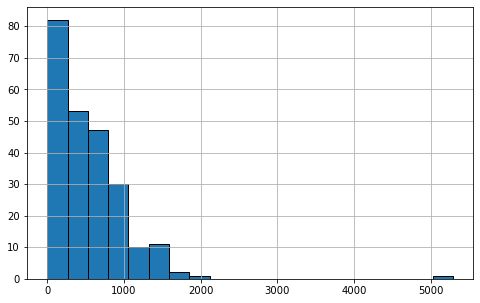

In [112]:
import plotly.express as px
(daily_new_cases_MI.mean()).hist(bins=20, ec='black', figsize=(8,5))

#### The histogram shows a right skewed distribution. For this reason, a gamma distrubition can fit the date. However, since gamma distribution works only for continous variables and our data in this case is discrete because we are counting the number of cases and death relating to COVID19, it will not work. Poisson distribution is for discrete variables and it gets the probability of an event to happen within an interval of time. Therefore, Poisson Distribution will best fit this dataset.

In [113]:
#Weekly mean for MI 
lambda_value= the_mean_cases
mean_MI, var_MI, skew_MI, kurt_MI= poisson.stats(lambda_value, moments='mvsk')

#### The lambda value represents the mean of the weekly mean; so we are considering a 7 days interval . The first block of code below will print the pmf and the second will plot the pmf. 

In [114]:
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

#print the pmf 
for i in range(0, 150, 5):
    p =poisson.pmf(k=i, mu=lambda_value)
    #print('The probability of having', i, 'cases per week is: ', p)
    
#plot the pmf 
x1= np.arange(0,100,1)
fig = px.bar(x=x1, y=poisson.pmf(k=x1, mu=lambda_value), labels={'x':'Number of cases MI', 'y':'Probability'})
fig.show()
fig.write_image("images/Poisson_MI.png")

### Statistics for the Poisson distribution of Michigan State: the mean and the variance are equal to the lambda value lambda_value = mean_MI = var_MI = 53. The skewness and the kurtosis of the distribution are 0.137 and 0.018 respectively. This result also indicates that the shape of the Poisson distribution will be close to normal which the histogram above confirms. 

#### Modeling the poisson distribution for more states. The same states as in task 1 were considered because they have a similar number of population as the initial chosen state. The values for lambda are taken from the weekly statistic in task1. 

In [115]:
lambda_value_GA=118
mean, var, skew, kurt= poisson.stats(lambda_value_GA, moments='mvsk')

lambda_value_IL= 88
mean, var, skew, kurt= poisson.stats(lambda_value_IL, moments='mvsk')

lambda_value_NC= 75
mean, var, skew, kurt= poisson.stats(lambda_value_NC, moments='mvsk')

lambda_value_OH= 50
mean, var, skew, kurt= poisson.stats(lambda_value_OH, moments='mvsk')


lambda_value_GA_death= 3
mean, var, skew, kurt= poisson.stats(lambda_value_GA_death, moments='mvsk')


lambda_value_IL_death= 3
mean, var, skew, kurt= poisson.stats(lambda_value_IL_death, moments='mvsk')


lambda_value_NC_death= 1
mean, var, skew, kurt= poisson.stats(lambda_value_NC_death, moments='mvsk')


lambda_value_OH_death= 2
mean, var, skew, kurt= poisson.stats(lambda_value_OH_death, moments='mvsk')


#### Poisson distribution for GA state

In [116]:
for i in range(100, 200, 1):
    p =poisson.pmf(k=i, mu= lambda_value_GA)
    #print('The probability of having', i, 'cases per week is: ', p, '\n')
    
xGC= np.arange(100, 200, 1)
fig = px.bar(x=xGC, y=poisson.pmf(k=xGC, mu=lambda_value_GA), labels={'x':'GA cases', 'y':'Probability'})
fig.show()
fig.write_image("images/Poisson_GA_cases.png")
    
#Poisson for number of deaths 
    
for i in range(0, 50, 1):
    p =poisson.pmf(k=i, mu= lambda_value_GA_death)
    #print('The probability of having', i, 'deaths per week is: ', p, '\n')
xGD= np.arange(0, 50, 1)
fig1 = px.bar(x=xGD, y=poisson.pmf(k=xGD, mu=lambda_value_GA_death), labels={'x':'GA death', 'y':'Probability'})
fig1.show()
fig1.write_image("images/Poisson_GA_death.png")

#### Poisson distribution for IL state

In [117]:
for i in range(0, 150, 1):
    p =poisson.pmf(k=i, mu=lambda_value_IL)
    #print('The probability of having', i, 'cases per week is: ', p, '\n')
    
#Plot
xIC= np.arange(0, 150, 1)
fig = px.bar(x=xIC, y=poisson.pmf(k=xIC, mu=lambda_value_IL), labels={'x':'IL cases', 'y':'Probability'})
fig.show()
fig.write_image("images/Poisson_IL_cases.png")


for i in range(0,30,1):
    p =poisson.pmf(k=i, mu= lambda_value_IL_death)
    #print('The probability of having', i, 'deaths per week is: ', p, '\n')
    
#Plot    
xID= np.arange(0,30,1)
fig = px.bar(x=xID, y=poisson.pmf(k=xID, mu=lambda_value_IL_death), labels={'x':'IL deaths', 'y':'Probability'})
fig.show()
fig.write_image("images/Poisson_IL_death.png")

#### Poisson distribution for NC state

In [118]:
for i in range(0, 150, 1):
    p =poisson.pmf(k=i, mu=lambda_value_NC)
    #print('The probability of having', i, 'cases per week is: ', p, '\n')
#plot for pmf
xNC= np.arange(0, 150, 1)
fig = px.bar(x=xNC, y=poisson.pmf(k=xNC, mu=lambda_value_NC), labels={'x':'NC cases', 'y':'Probability'})
fig.show()
fig.write_image("images/Poisson_NC_cases.png")
    
#PMF for death 
for i in range(0,30,1):
    p =poisson.pmf(k=i, mu= lambda_value_NC_death)
    #print('The probability of having', i, 'deaths per week is: ', p, '\n')
    
#plot for pmf 
xND= np.arange(0,30,1)
fig = px.bar(x=xND, y=poisson.pmf(k=xND, mu=lambda_value_NC_death), labels={'x':'NC deaths', 'y':'Probability'})
fig.show()
fig.write_image("images/Poisson_NC_death.png")

#### Poisson distribution for OH state

In [119]:
for i in range(0, 150, 1):
    p =poisson.pmf(k=i, mu=lambda_value_OH)
    #print('The probability of having', i, 'cases per week is: ', p, '\n')

#plot for pmf 
xOC= np.arange(0, 150, 1)
fig = px.bar(x=xOC, y=poisson.pmf(k=xOC, mu=lambda_value_OH), labels={'x':'OH cases', 'y':'Probability'})
fig.show()
fig.write_image("images/Poisson_OH_death.png")
    
for i in range(0,30,1):
    p =poisson.pmf(k=i, mu=lambda_value_OH_death)
    #print('The probability of having', i, 'death per week is: ', p, '\n')
    
#plot for pmf 
xOD= np.arange(0,30,1)
fig = px.bar(x=xOD, y=poisson.pmf(k=xOD, mu=lambda_value_OH_death), labels={'x':'OH deaths', 'y':'Probability'})
fig.show()
fig.write_image("images/Poisson_OH_death.png")

### Poisson for NC top 5 counties 

In [120]:
NC_couties_cases =read_cases1.loc[read_cases1['State'] == 'NC']
NC_countyName= NC_couties_cases['County Name']
NC_couties_cases= NC_couties_cases.drop(columns=['County Name', 'State'], axis=1)
daily_new_cases_NC_counties= NC_couties_cases.diff(axis=1)
daily_new_cases_NC_counties.fillna(0, inplace=True)
daily_new_cases_NC_counties= daily_new_cases_NC_counties
daily_new_cases_NC_counties
NC_couties_cases.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20
1926,0,0,0,0,0,0,0,0,0,0,...,3379,3391,3417,3428,3431,3452,3502,3526,3558,3573
1927,0,0,0,0,0,0,0,0,0,0,...,433,439,442,446,457,460,464,471,472,473
1928,0,0,0,0,0,0,0,0,0,0,...,207,207,210,210,210,210,214,215,217,217
1929,0,0,0,0,0,0,0,0,0,0,...,468,480,483,483,487,492,499,505,508,510
1930,0,0,0,0,0,0,0,0,0,0,...,222,225,227,229,231,232,238,240,240,241


In [121]:
NC_couties_death =read_death1.loc[read_death1['State'] == 'NC']
NC_couties_death =  NC_couties_death.drop(columns=['County Name', 'State'], axis=1)
daily_new_death_NC_counties=NC_couties_death.diff(axis=1)
daily_new_death_NC_counties.fillna(0, inplace=True)
daily_new_death_NC_counties=daily_new_death_NC_counties
daily_new_death_NC_counties.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20
1926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### This section identify the top 5 counties in NC states that have the higher number of covid cases.The calculation to detect the most infected counties was performed base on the weekly mean values of all counties. 

In [122]:
weekly_mean_for_cases_NC = daily_new_cases_NC_counties.groupby(np.arange(len(daily_new_cases_NC_counties.columns)) // 7, axis=1).mean().round(0)
the_mean_NC_cases= round(weekly_mean_for_cases_NC.mean(axis=1))
merge_with_countyName= (pd.concat([NC_countyName, the_mean_NC_cases], axis=1))
merge_with_countyName=merge_with_countyName.rename(columns={0:"Mean_cases"})
top_5counties_cases=merge_with_countyName.nlargest(5,'Mean_cases')
top_5counties_cases

,County Name,Mean_cases
1985,Mecklenburg County,114.0
2017,Wake County,69.0
1966,Guilford County,33.0
1957,Durham County,31.0
1959,Forsyth County,28.0


#### This section identify the top 5 counties in NC states that have the higher number of death due to teh COVID19.The calculation to detect the counties with higher number of death was also performed base on the weekly mean values of all counties.  However, because the average of number of death is low, there was only counties that has 1 as mean all the other has a rounded mean of 0.

In [123]:
weekly_mean_for_death_NC = (daily_new_death_NC_counties.groupby(np.arange(len(daily_new_death_NC_counties.columns)) // 7, axis=1).mean())
the_mean_NC_death = round(weekly_mean_for_death_NC.mean(axis=1))
merge_with_countyName_death= (pd.concat([NC_countyName, the_mean_NC_death], axis=1))
merge_with_countyName_death=merge_with_countyName_death.rename(columns={0:"Mean_death"})
top_5counties_death=merge_with_countyName_death.nlargest(5,'Mean_death')
top_5counties_death

,County Name,Mean_death
1966,Guilford County,1.0
1985,Mecklenburg County,1.0
2017,Wake County,1.0
1926,Alamance County,0.0
1927,Alexander County,0.0


#### Normalizing the value daily value of cases and death in the top 5 counties in NC state. note alos that because the number of daily new death was 0 in a lot of counties, this makes the mean to be really low and rounding it will give 0. So, so for that purpose the mean of daily death will not be rounded.

In [124]:
#normalize and get mean for cases 
normalized_daily_new_cases_Mecklenburg= ((daily_new_cases_NC_counties.iloc[59].div(1110356)).multiply(100_000)).round(0)
normalized_daily_new_cases_Wake= ((daily_new_cases_NC_counties.iloc[91].div(1111761)).multiply(100_000)).round(0)
normalized_daily_new_cases_Guilford= ((daily_new_cases_NC_counties.iloc[40].div(537174)).multiply(100_000)).round(0)
normalized_daily_new_cases_Durham= ((daily_new_cases_NC_counties.iloc[31].div(321488)).multiply(100_000)).round(0)
normalized_daily_new_cases_Forsyth = ((daily_new_cases_NC_counties.iloc[33].div(117417)).multiply(100_000)).round(0)

meanCM= round((normalized_daily_new_cases_Mecklenburg.mean()).mean())
meanCW=round((normalized_daily_new_cases_Wake.mean()).mean())
meanCG=round((normalized_daily_new_cases_Guilford.mean()).mean())
meanCD=round((normalized_daily_new_cases_Durham.mean()).mean())
meanCF=round((normalized_daily_new_cases_Forsyth.mean()).mean())

#normalize and get mean for death
normalized_daily_new_death_Mecklenburg= ((daily_new_death_NC_counties.iloc[59].div(1110356)).multiply(100_000)).round(0)
normalized_daily_new_death_Wake= ((daily_new_death_NC_counties.iloc[91].div(1111761)).multiply(100_000)).round(0)
normalized_daily_new_death_Guilford= ((daily_new_death_NC_counties.iloc[40].div(537174)).multiply(100_000)).round(0)

meanDM= (normalized_daily_new_death_Mecklenburg.mean()).mean()
meanDW=(normalized_daily_new_death_Wake.mean()).mean()
meanDG=(normalized_daily_new_death_Guilford.mean()).mean()


0.11814345991561181

### Poisson distribution for top five NC counties: statistics of the distribution 

In [125]:
lambda_value_M= meanCM
mean, var, skew, kurt= poisson.stats(lambda_value_M, moments='mvsk')

lambda_value_W= meanCW
mean, var, skew, kurt= poisson.stats(lambda_value_W, moments='mvsk')

lambda_value_G=meanCG
mean, var, skew, kurt= poisson.stats(lambda_value_G, moments='mvsk')

lambda_value_D= meanCD
mean, var, skew, kurt= poisson.stats(lambda_value_D, moments='mvsk')

lambda_value_F= meanCF
mean, var, skew, kurt= poisson.stats(lambda_value_H, moments='mvsk')

lambda_value_M_death= meanDM
mean, var, skew, kurt= poisson.stats(lambda_value_M_death, moments='mvsk')


lambda_value_W_death= meanDW
mean, var, skew, kurt= poisson.stats(lambda_value_W_death, moments='mvsk')


lambda_value_G_death= meanDG
mean, var, skew, kurt= poisson.stats(lambda_value_G_death, moments='mvsk')


#### Poisson distribution for cases and death for Mecklenburg County

In [126]:
for i in range(0,130,1):
    p =poisson.pmf(k=i, mu= lambda_value_M)
    #print('The probability of having', i, 'cases per day is: ', p, '\n')
    
#plot for pmf 
xMC= np.arange(0,130,1)
fig = px.bar(x=xMC, y=poisson.pmf(k=xMC, mu=lambda_value_M), labels={'x':'Mecklenburg cases', 'y':'Probability'})
fig.show()
fig.write_image("images/Poisson_Mecklenburg_cases.png")

#plot for pmf 
for i in range(0,5,1):
    p =poisson.pmf(k=i, mu= lambda_value_M_death)
    #print('The probability of having', i, 'deaths per day is: ', p, '\n')
    
xMD= np.arange(0,5,1)
fig = px.bar(x=xMD, y=poisson.pmf(k=xMD, mu=lambda_value_M_death), labels={'x':'Mecklenburg death', 'y':'Probability'})
fig.show()
fig.write_image("images/Poisson_Mecklenburg_death.png")

#### Poisson distribution for cases and death for Wake County

In [127]:
for i in range(0,130,1):
    p =poisson.pmf(k=i, mu= lambda_value_W)
    #print('The probability of having', i, 'cases per day is: ', p, '\n')

#plot for pmf 
xWC= np.arange(0,130,1)
fig = px.bar(x=xWC, y=poisson.pmf(k=xWC, mu=lambda_value_W), labels={'x':'Wake cases', 'y':'Probability'})
fig.show()
fig.write_image("images/Poisson_Wake_cases.png")


for i in range(0, 5, 1):
    p =poisson.pmf(k=i, mu= lambda_value_W_death)
    #print('The probability of having', i, 'deaths per day is: ', p, '\n')
    
xWD= np.arange(0,5,1)
fig = px.bar(x=xWD, y=poisson.pmf(k=xWD, mu=lambda_value_W_death), labels={'x':'Wake death', 'y':'Probability'})
fig.show()
fig.write_image("images/Poisson_Wake_death.png")   

#### Poisson distribution for cases and death for Guilford County

In [128]:
for i in range(5, 25, 5):
    p =poisson.pmf(k=i, mu= lambda_value_G)
    #print('The probability of having', i, 'cases per day is: ', p, '\n')
    

#plot for pmf 
xGC= np.arange(0,130,1)
fig = px.bar(x=xGC, y=poisson.pmf(k=xGC, mu=lambda_value_G), labels={'x':'Guilford cases', 'y':'Probability'})
fig.show()
fig.write_image("images/Poisson_Guilford_cases.png")    
    
for i in range(5, 25, 5):
    p =poisson.pmf(k=i, mu= lambda_value_G_death)
    #print('The probability of having', i, 'deaths per day is: ', p, '\n')

xGD= np.arange(0,5,1)
fig = px.bar(x=xGD, y=poisson.pmf(k=xGD, mu=lambda_value_G_death), labels={'x':'Guilford death', 'y':'Probability'})
fig.show()
fig.write_image("images/Poisson_Guilford_death.png")

#### Poisson distribution for cases for Durham County. The mean for death was 0 which will make the probability 0 as well.

In [129]:
for i in range(5, 25, 5):
    p =poisson.pmf(k=i, mu= lambda_value_D)
    #print('The probability of having', i, 'cases per day is: ', p, '\n')
    
#plot for pmf 
xDC= np.arange(0,130,1)
fig = px.bar(x=xDC, y=poisson.pmf(k=xDC, mu=lambda_value_D), labels={'x':'Durham cases', 'y':'Probability'})
fig.show()
fig.write_image("images/Poisson_Durham_cases.png")

#### Poisson distribution for cases for Forsyth County. The mean for death was 0 which will make the probability 0 as well.

In [130]:
for i in range(5, 25, 5):
    p =poisson.pmf(k=i, mu= lambda_value_F)
   # print('The probability of having', i, 'cases per day is: ', p , '\n')

#plot for pmf 
xFC= np.arange(0,130,1)
fig = px.bar(x=xFC, y=poisson.pmf(k=xFC, mu=lambda_value_F), labels={'x':'Forsyth cases', 'y':'Probability'})
fig.show()
fig.write_image("images/Poisson_Forsyth_cases.png")

## Correlation between enrichment data and covid19

###### we can get the correlation between the total number confirmed cases for the last day registred and the level of employment in January feb and march. observing this correlaction can help us determine a certain pattern between covid and the level of employment in the US.  let's get the dataset from the previous stage with employment and COVID19.   

In [131]:
#data was load and filtred to get only MI counties 
read_covid_emp= pd.read_csv('../../data/output/COVID19_EMPLOYMENT_MERGE.csv')
read_covid_emp =read_covid_emp.drop(read_covid_emp.loc[read_covid_emp['County Name'] == "Statewide Unallocated"].index)
MI_counties =read_covid_emp.loc[read_covid_emp['State'] == 'MI']
MI_counties.head()

,Unnamed: 0,Unnamed: 0.1,countyFIPS,County Name,State,population,County Name_x,stateFIPS,1/22/20_x,1/23/20_x,...,9/9/20_y,9/10/20_y,9/11/20_y,9/12/20_y,9/13/20_y,9/14/20_y,Establishment Count,January Employment,February Employment,March Employment
1255,1255,1255,26001,Alcona County,MI,10405,Alcona County,26,0,0,...,2,2,2,2,2,2,746.0,5959.0,5837.0,5873.0
1256,1256,1256,26003,Alger County,MI,9108,Alger County,26,0,0,...,0,0,0,0,0,0,928.0,6964.0,7040.0,6741.0
1257,1257,1257,26005,Allegan County,MI,118081,Allegan County,26,0,0,...,7,7,7,7,7,7,9510.0,146468.0,146164.0,145676.0
1258,1258,1258,26007,Alpena County,MI,28405,Alpena County,26,0,0,...,14,14,14,14,14,14,3260.0,40484.0,40540.0,40108.0
1259,1259,1259,26009,Antrim County,MI,23324,Antrim County,26,0,0,...,0,0,0,0,0,0,2248.0,17522.0,17462.0,17086.0


##### Getting the variables that will be used from MI state for the performance of the correlation

In [132]:
countyName=MI_counties['County Name']
MI_cases= MI_counties.loc[:, MI_counties.columns.str.endswith("_x")]
MI_cases=MI_cases.rename(columns={"9/14/20_x":'Total cases'})
total_confirmed_cases_per_county= MI_cases["Total cases"]
MI_emp= MI_counties.loc[:, MI_counties.columns.str.endswith("nt")]
new_MI_emp= (pd.concat([countyName,total_confirmed_cases_per_county, MI_emp], axis=1))
new_MI_emp.head()


,County Name,Total cases,Establishment Count,January Employment,February Employment,March Employment
1255,Alcona County,41,746.0,5959.0,5837.0,5873.0
1256,Alger County,17,928.0,6964.0,7040.0,6741.0
1257,Allegan County,702,9510.0,146468.0,146164.0,145676.0
1258,Alpena County,133,3260.0,40484.0,40540.0,40108.0
1259,Antrim County,64,2248.0,17522.0,17462.0,17086.0


#### Perform a pearson correlation on all the counties of Michigan state 

In [133]:
new_MI_emp.corr(method ='pearson') 

,Total cases,Establishment Count,January Employment,February Employment,March Employment
Total cases,1.000000,0.935332,0.947923,0.947540,0.946976
Establishment Count,0.935332,1.000000,0.989291,0.989033,0.988912
January Employment,0.947923,0.989291,1.000000,0.999996,0.999987
February Employment,0.947540,0.989033,0.999996,1.000000,0.999996
March Employment,0.946976,0.988912,0.999987,0.999996,1.000000


### Calculate the correlation within all the US states. As a correlation was performed for MI state and the it was strong, this below calculation will allow us to derive a general hypothesis between the level of employment and the total number of confirmed cases.

In [134]:
the_states= read_covid_emp.groupby(['State']).sum()

the_states_cases= the_states.loc[:, the_states.columns.str.endswith("_x")]
states_emp= the_states.loc[:, the_states.columns.str.endswith("nt")]

the_states_cases= the_states_cases.rename(columns={"9/14/20_x":'Total cases'})
total_confirmed_cases_per_states=  the_states_cases["Total cases"]

new_states= (pd.concat([total_confirmed_cases_per_states, states_emp], axis=1))
new_states.head()


,Total cases,Establishment Count,January Employment,February Employment,March Employment
State,,,,,
AK,6351,80934.0,1032573.0,1054051.0,1051736.0
AL,139459,456428.0,6942339.0,6974895.0,6963736.0
AR,68999,317950.0,4319628.0,4325855.0,4319984.0
AZ,208725,621914.0,10899353.0,10951852.0,10873460.0
CA,765475,6257508.0,63963035.0,64506618.0,63638023.0


### correlation between the 4 variables 

In [135]:
new_states.corr(method ='pearson') 

,Total cases,Establishment Count,January Employment,February Employment,March Employment
Total cases,1.000000,0.910471,0.944195,0.944487,0.944666
Establishment Count,0.910471,1.000000,0.968806,0.969469,0.968417
January Employment,0.944195,0.968806,1.000000,0.999993,0.999993
February Employment,0.944487,0.969469,0.999993,1.000000,0.999988
March Employment,0.944666,0.968417,0.999993,0.999988,1.000000


### Hypothesis: A Pearson correlation was calculated between the employment level and the number of COVID19 case. The number of cases and the employment level were found to be strongly correlated. This study indicates that there is a linear relationship between the employment level and the number of cases of COVID19. In other words, regions with higher employment level, tend to have a higher number of COVID19 cases.